In [3]:
import numpy as np
import pandas as pd
from sklearn import tree
import graphviz
from sklearn import preprocessing
labelsWeather = ['Tiempo', 'Temperatura', 'Humedad', 'Viento', 'Juega']

In [4]:
weather_data = pd.read_csv("weather.csv",index_col=0)

In [5]:
weather_data.head()

,Tiempo,Temperatura,Humedad,Viento,Juega
Ejemplo,,,,,
1,Soleado,Alta,Alta,No,N
2,Soleado,Alta,Alta,Si,N
3,Nubloso,Alta,Alta,No,P
4,Lluvioso,Media,Alta,No,P
5,Lluvioso,Media,Normal,No,P


In [6]:
#calcular la entropia
def calcular_entropia(p):
  return -np.sum(p*np.log2(p))

# Clima


In [7]:
data_weather = pd.DataFrame()
le_w = preprocessing.LabelEncoder()

for v in labelsWeather:
    le_w.fit(weather_data[v])
    data_weather[v] = le_w.transform(weather_data[v])

#construir el arbol
clf_w = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth=4)

t_data = data_weather[data_weather.columns[0:4]]
t_respuesta = data_weather[data_weather.columns[4]]

#crear el modelo
clf_w = clf_w.fit(t_data, t_respuesta)
t_data,t_respuesta,clf_w

(    Tiempo  Temperatura  Humedad  Viento
 0        2            0        0       0
 1        2            0        0       1
 2        1            0        0       0
 3        0            2        0       0
 4        0            2        1       0
 5        0            1        1       1
 6        1            1        1       1
 7        2            2        0       0
 8        2            1        1       0
 9        0            2        1       0
 10       2            2        1       1
 11       1            2        0       1
 12       1            0        1       0
 13       0            2        0       1,
 0     0
 1     0
 2     1
 3     1
 4     1
 5     0
 6     1
 7     0
 8     1
 9     1
 10    1
 11    1
 12    1
 13    0
 Name: Juega, dtype: int32,
 DecisionTreeClassifier(criterion='entropy', max_depth=4))

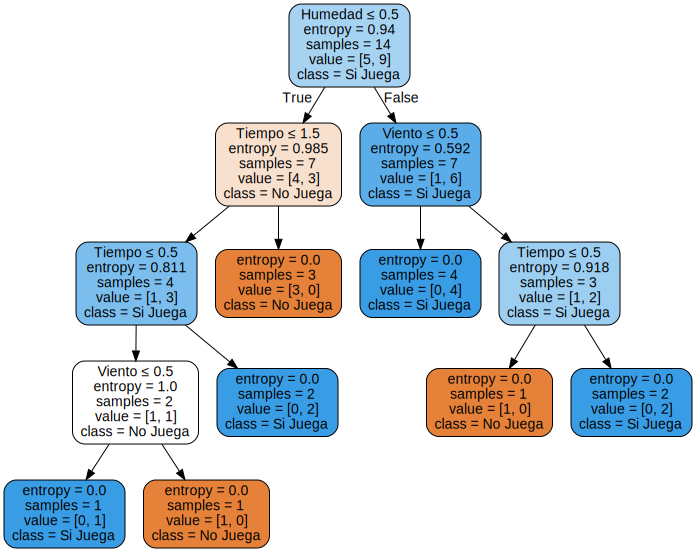

In [8]:
import graphviz
dot_data = tree.export_graphviz(clf_w, out_file=None,
                         feature_names=list(t_data.columns.values),
                         class_names=["No Juega", "Si Juega"],
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

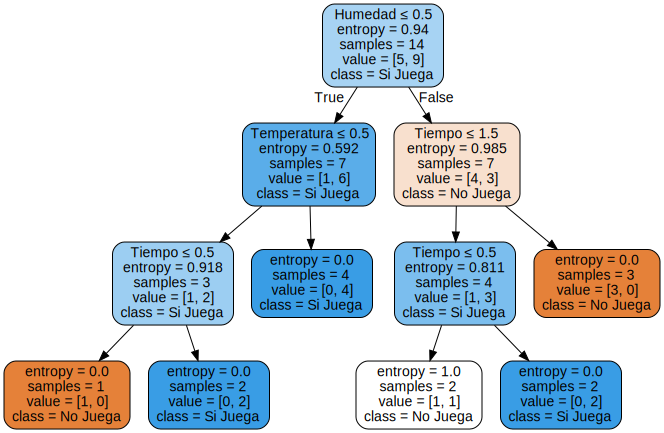

In [9]:
from sklearn import tree

data_weather = weather_data.copy()
data_weather["Tiempo"] = np.where(data_weather["Tiempo"]=="Soleado", 2,
                          np.where(data_weather["Tiempo"]=="Nubloso", 1, 0))
data_weather["Temperatura"] = np.where(data_weather["Temperatura"]=="Alta", 2,
                          np.where(data_weather["Temperatura"]=="Media", 1, 0))
data_weather["Humedad"] = np.where(data_weather["Humedad"] == "Alta",1,0)
data_weather["Viento"] = np.where(data_weather["Humedad"] == "Si",1,0)


#construir el arbol
clf = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth=4)

t_data = data_weather[data_weather.columns[0:4]]
t_respuesta = data_weather[data_weather.columns[4]]

#crear el modelo
clf = clf.fit(t_data, t_respuesta)

dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=list(t_data.columns.values),
                         class_names=["No Juega", "Si Juega"],
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph



# Test del Modelo

## Sacar la información del csv de pruebas con preprosesamiento manual pandas

In [23]:
weather_test = pd.read_csv("weatherTest.csv",index_col=0)
weather_test["Tiempo"] = np.where(weather_test["Tiempo"]=="Soleado", 2,
                          np.where(weather_test["Tiempo"]=="Nubloso", 1, 0))
weather_test["Temperatura"] = np.where(weather_test["Temperatura"]=="Alta", 2,
                          np.where(weather_test["Temperatura"]=="Media", 1, 0))
weather_test["Humedad"] = np.where(weather_test["Humedad"] == "Alta",1,0)
weather_test["Viento"] = np.where(weather_test["Viento"] == "Si",1,0)

x_test = weather_test[weather_test.columns[0:4]]
#Crear modelo
y_pred = clf.predict(x_test)

In [24]:
t_data

,Tiempo,Temperatura,Humedad,Viento
0,2,0,0,0
1,2,0,0,1
2,1,0,0,0
3,0,2,0,0
4,0,2,1,0
5,0,1,1,1
6,1,1,1,1
7,2,2,0,0
8,2,1,1,0
9,0,2,1,0


In [25]:
t_respuesta

Ejemplo
1     N
2     N
3     P
4     P
5     P
6     N
7     P
8     N
9     P
10    P
11    P
12    P
13    P
14    N
Name: Juega, dtype: object

In [26]:
y_pred

array([1, 1, 1])

In [11]:
weather_test = pd.read_csv("weatherTest.csv",index_col=0)
data_weather = pd.DataFrame()
#weather_test = pd.DataFrame()

le = preprocessing.LabelEncoder()

for v in labelsWeather:
    le.fit(weather_data[v])
    data_weather[v] = le.transform(weather_data[v])
    le.fit(weather_test[v])
    weather_test[v] = le.transform(weather_test[v])

# Build tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

t_data = data_weather[data_weather.columns[0:4]]
t_target = data_weather[data_weather.columns[4]]
w_test = weather_test[weather_test.columns[0:4]]

# Fit model to data
clf = clf.fit(t_data, t_target)
y_pred = clf.predict(w_test)
t_data, t_target, y_pred


(    Tiempo  Temperatura  Humedad  Viento
 0        2            0        0       0
 1        2            0        0       1
 2        1            0        0       0
 3        0            2        0       0
 4        0            2        1       0
 5        0            1        1       1
 6        1            1        1       1
 7        2            2        0       0
 8        2            1        1       0
 9        0            2        1       0
 10       2            2        1       1
 11       1            2        0       1
 12       1            0        1       0
 13       0            2        0       1,
 0     0
 1     0
 2     1
 3     1
 4     1
 5     0
 6     1
 7     0
 8     1
 9     1
 10    1
 11    1
 12    1
 13    0
 Name: Juega, dtype: int32,
 array([1, 1, 1]))